# Analyzing the Link: Internet Download Speeds and House Prices in England and Wales

Student ID number: 201777020

## Introduction

The average house prices within an area can serve as an indicator of its socioeconomic status, shedding light on potential deprivation. Research findings suggest a gradual decline in house prices corresponding to increasing levels of deprivation <a href="#ref5">[5]</a>. Deprivation, synonymous with inequalities, encompasses various dimensions <a href="#ref3">[3]</a>, one of which is the digital divide. This phenomenon highlights the lack of reliable internet access in deprived areas <a href="#ref4">[4]</a>.

In this essay, we delve into an examination of the potential correlation between the average internet download speed of Lower-layer Super Output Areas (LSOA) in England and Wales and the average house prices in the year 2018.

In [1]:
# we first started by importing the required packages

# Imported the pandas library for data manipulation and analysis
import pandas as pd

# Imported the matplotlib.pyplot library for creating data visualizations
import matplotlib.pyplot as plt

# Imported the matplotlib.colors module for handling colors in visualizations
import matplotlib.colors as mcolors

# Imported the seaborn library for additional data visualization capabilities
import seaborn as sns

# Imported the statsmodels library for conducting linear regression
import statsmodels.api as sm

In [2]:
# Imported the warnings library to disable warning messages
import warnings

# Disabled warning messages
warnings.filterwarnings('ignore')

## Data

Three datasets were used in the analysis. The datasets include 2018 Average Broadband Performance (Speed) by OA <a href="#ref2">[2]</a>, Median House Prices by LSOA (Quarters, 1995-2018) <a href="#ref6">[6]</a>, and Postcode to Output Area to Lower Layer Super Output Area to Middle Layer Super Output Area to Local Authority District (December 2011) Lookup in England and Wales <a href="#ref7">[7]</a>. The geographic boundaries were obtained from the 2011 census geography boundaries (Lower Layer Super Output Areas and data zones) in shapefile format <a href="#ref1">[1]</a>.

In [3]:
# set up the file path of the broadband speed data
oa_2018_fixed_broadband_filepath = "ass2_data/201805_fixed_oa11_performance_r02.csv"

In [4]:
# set up the file path of the house prices data
lsoa_median_house_prices_filepath = "ass2_data/Median_Prices_Quarterly.csv"

In [5]:
# set up the file path of the oa to lsoa data
oa_to_lsoa_to_msoa_filepath = "ass2_data/PCD11_OA11_LSOA11_MSOA11_LAD11_EW_LU_aligned_v2.csv"

In [6]:
# loaded the broadband speed data
oa_2018_fixed_broadband_df = pd.read_csv(oa_2018_fixed_broadband_filepath)

In [7]:
# loaded the house prices data
lsoa_median_house_prices_df = pd.read_csv(lsoa_median_house_prices_filepath)

In [8]:
# loaded the OA to LSOA to MSOA data
oa_to_lsoa_to_msoa_df = pd.read_csv(oa_to_lsoa_to_msoa_filepath)

In [9]:
# selected columns to keep in the OA to LSOA to MSOA dataset while discarding the rest
columns_to_keep = ['OA11CD', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM']

# created new dataframe which had the OA code as the primary key of sorts
oa_to_lsoa_to_msoa_df_2 = oa_to_lsoa_to_msoa_df[columns_to_keep].drop_duplicates(subset=['OA11CD'])

In [10]:
# added lsoa information to broadband speed data by merging it with recently created dataset
oa_2018_fixed_broadband_df_2 = pd.merge(
    oa_2018_fixed_broadband_df, 
    oa_to_lsoa_to_msoa_df_2, 
    left_on='oa11', 
    right_on='OA11CD', 
    how='left'
)

In [11]:
# we were interested in insights at the LSOA level, therefore
# we averaged the speed based on all the OAs of a particular LSOA
lsoa_2018_fixed_broadband_df = oa_2018_fixed_broadband_df_2.groupby('LSOA11CD')['Median download speed (Mbit/s)'].mean().reset_index()

In [12]:
# created a new dataframe which had information on the average house price of a particular LSOA in 2018
lsoa_2018_median_house_prices_df = pd.DataFrame({
    'LSOA11CD': lsoa_median_house_prices_df['lsoa_cd'],
    'Average 2018 House Price': lsoa_median_house_prices_df[['median_18Q1', 'median_18Q2', 'median_18Q3', 'median_18Q4']].median(axis=1)
})

In [13]:
# Dropped all null values from the dataset
lsoa_2018_fixed_broadband_df = lsoa_2018_fixed_broadband_df.dropna(subset=['LSOA11CD', 'Median download speed (Mbit/s)'])
lsoa_2018_median_house_prices_df = lsoa_2018_median_house_prices_df.dropna(subset=['LSOA11CD', 'Average 2018 House Price'])

# merged the broadband speed and house prices datasets
merged_df = pd.merge(
    lsoa_2018_fixed_broadband_df,
    lsoa_2018_median_house_prices_df,
    left_on='LSOA11CD',
    right_on='LSOA11CD',
    how='inner'  
)

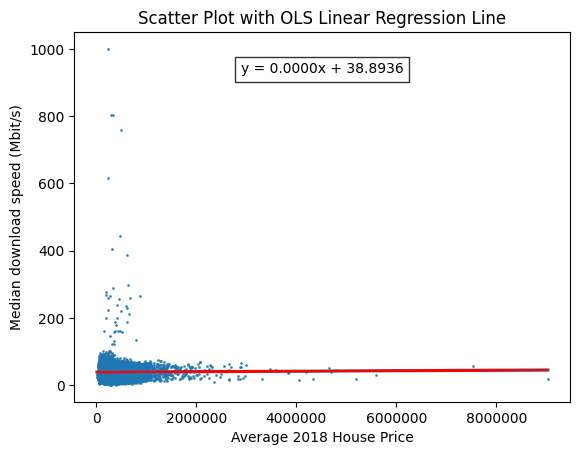

In [14]:

# Scatter plot with regression line
sns.regplot(
    x='Average 2018 House Price', 
    y='Median download speed (Mbit/s)', 
    scatter_kws={'s':1},
    data=merged_df)

# Fit linear regression model
X = sm.add_constant(merged_df['Average 2018 House Price'])
y = merged_df['Median download speed (Mbit/s)']
model = sm.OLS(y, X).fit()

# Get slope and intercept of the regression line
slope = model.params['Average 2018 House Price']
intercept = model.params['const']

# Plot the regression line
plt.plot(merged_df['Average 2018 House Price'], slope * merged_df['Average 2018 House Price'] + intercept, color='red')

# Show the equation on the chart
equation = f"y = {slope:.4f}x + {intercept:.4f}"
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Format x-axis numbers
plt.ticklabel_format(style='plain', axis='x')

plt.title('Scatter Plot with OLS Linear Regression Line')
plt.xlabel('Average 2018 House Price')
plt.ylabel('Median download speed (Mbit/s)')
plt.show()

## Discussion

The scatterplot visually suggests an absence of a discernible relationship between median download speed and house prices. This observation is succinctly articulated through the mathematical formulation of a linear regression model, wherein the coefficient of the independent variable is determined to be 0. In other words, there is no correlation between house prices and the average internet download speed in England and Wales. The intercept value of 38.9 tells us that the average internet download speed in England and Wales is 38.9 Mbits/ s.

A deliberate design choice was the incorporation of the linear regression equation into the chart. This decision facilitates a seamless connection between the visual representation and its mathematical counterpart, aiding readers in grasping the correlation between the two aspects. To enhance clarity, the size of the points on the graph was minimized to mitigate potential overlaps, ensuring ease of interpretation. Additionally, employing distinct colours for the regression line and data points serves to emphasize the differentiation between the two elements.

In [15]:
# imported further required packages

# Imported geopandas library for spatial data manipulation
import geopandas as gpd

In [16]:
# set the file path to the shapefiles
shape_file_file_path = "ass2_data/shp_lsoa/infuse_lsoa_lyr_2011.shp"

In [17]:
# loaded the shapefile
uk_sdf = gpd.read_file(shape_file_file_path)

In [18]:
# Merged the spatial and non-spatial dataframes based on the common columns geo_code and LSOA11CD
merged_geo_df = gpd.GeoDataFrame(pd.merge(uk_sdf, merged_df, left_on='geo_code', right_on='LSOA11CD'))

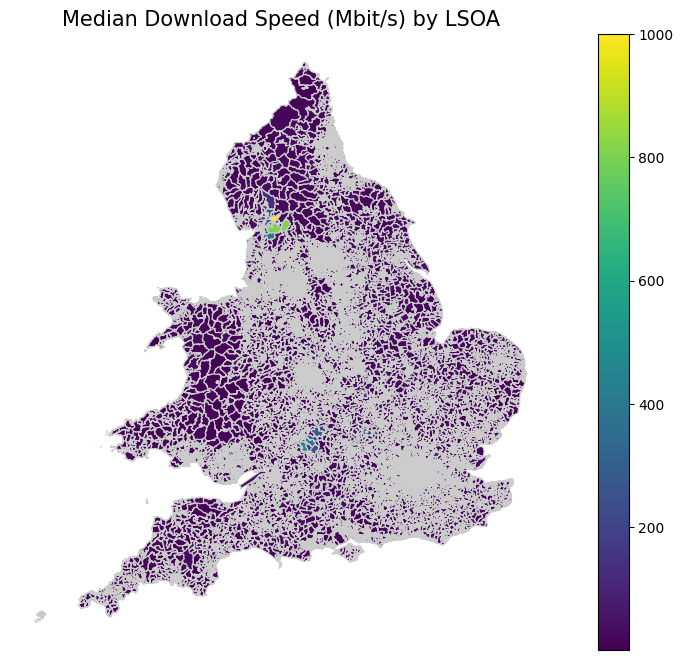

In [19]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set the variable column for the choropleth
variable_column = 'Median download speed (Mbit/s)'

# Plotting the choropleth map
merged_geo_df.plot(column=variable_column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Median Download Speed (Mbit/s) by LSOA', fontdict={'fontsize': '15', 'fontweight': '3'})

# removed axis
plt.axis('off')

# Display the plot
plt.show()

## Discussion

The map highlights a prevailing trend of uniformly low internet download speeds across most regions in England and Wales. Notably, areas with high internet download speeds tend to be in close proximity to each other, suggesting a positive spatial autocorrelation for internet speeds in the country.

The Viridis colormap was employed due to its perceptual uniformity, ensuring a consistent interpretation of the data. Although a colormap was included, subtle refinements for enhanced clarity could be considered. The strategic use of a thin line width (0.8) and a light gray edge color (0.8) contributes to clear and well-defined boundaries on the map. The title, "Median Download Speed (Mbit/s) by LSOA," is concise yet informative, providing a clear context for the presented data. The decision to disable the axis contributes to a visually uncluttered presentation, allowing for focused attention on the map's key elements.

## References

<a href="#ref1">[1]</a> 2011 census geography boundaries (Lower Layer Super Output Areas and data zones) - features in shapefile format (no date) UK Data Service CKAN. Available at: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones/resource/da5b2e03-b8b5-4c3d-b149-00cb72691f71 (Accessed: 15 December 2023). 

<a href="#ref2">[2]</a> 2018 Average Broadband Performance (Speed) by Oa - Broadband Speed: CDRC Data (no date) 2018 Average Broadband Performance (Speed) by OA - Broadband Speed | CDRC Data. Available at: https://data.cdrc.ac.uk/dataset/broadband-speed/resource/2018-average-broadband-performance-speed-oa (Accessed: 14 December 2023). 

<a href="#ref3">[3]</a> CASE/Oxfam, L. (no date) The Multidimensional Inequality Framework, CASE | MIF | Contact us. Available at: https://sticerd.lse.ac.uk/inequality/default.asp (Accessed: 14 December 2023). 

<a href="#ref4">[4]</a> García-Escribano, M. (2020) Low internet access driving inequality, IMF. Available at: https://www.imf.org/en/Blogs/Articles/2020/06/29/low-internet-access-driving-inequality (Accessed: 14 December 2023). 

<a href="#ref5">[5]</a> Joe Davies, K.M. (2022) Understanding towns in England and Wales: Town Characteristics and house prices, 2019, Understanding towns in England and Wales: town characteristics and house prices, 2019 - Office for National Statistics. Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/articles/understandingtownsinenglandandwalestowncharacteristicsandhouseprices2019/2022-04-19#:~:text=The%20relationship%20between%20income%20deprivation,market%20or%20social%20housing%20data. (Accessed: 14 December 2023). 

<a href="#ref6">[6]</a> Median house prices by LSOA (quarters, 1995-2018) - dwelling ages and prices: CDRC Data (no date) Median House Prices by LSOA (Quarters, 1995-2018) - Dwelling Ages and Prices | CDRC Data. Available at: https://data.cdrc.ac.uk/dataset/dwelling-ages-and-prices/resource/median-house-prices-lsoa-quarters-1995-2018 (Accessed: 14 December 2023). 

<a href="#ref7">[7]</a> Postcode to output area to lower layer super output area to middle layer super output area to local authority district (December 2011) lookup in England and Wales (no date) Open Geography Portal. Available at: https://geoportal.statistics.gov.uk/datasets/postcode-to-output-area-to-lower-layer-super-output-area-to-middle-layer-super-output-area-to-local-authority-district-december-2011-lookup-in-england-and-wales-1/about (Accessed: 14 December 2023). 